In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = r"C:\Users\John Taiwo\Desktop\opencv\aug\data\train"
valid_path = r"C:\Users\John Taiwo\Desktop\opencv\aug\data\valid"
test_path = r"C:\Users\John Taiwo\Desktop\opencv\aug\data\test"

In [41]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=10, shuffle=False)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

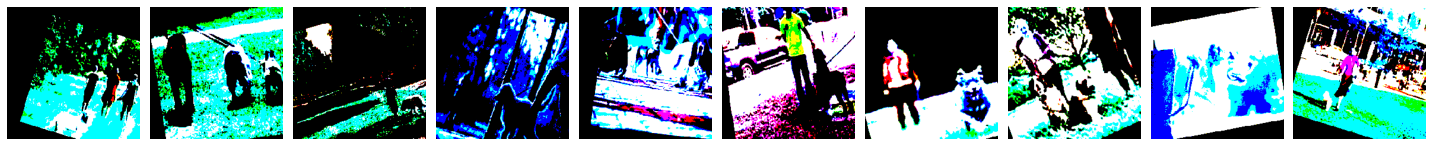

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [6]:
plotImages(imgs)
print(labels)

In [15]:
#build a fine-tuned pre-trained model

mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [16]:
x = mobile.layers[-6].output

In [17]:
output = Dense(units=3, activation='softmax')(x)

In [18]:
from tensorflow.keras.models import Model
model = Model(inputs=mobile.input, outputs=output)

In [19]:
for layer in model.layers[:-23]:
    layer.trainable = True

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=45,
    verbose=2
)

Epoch 1/45
300/300 - 446s - loss: 0.8082 - accuracy: 0.6523 - val_loss: 0.6368 - val_accuracy: 0.7483
Epoch 2/45
300/300 - 490s - loss: 0.3411 - accuracy: 0.8737 - val_loss: 0.6650 - val_accuracy: 0.7317
Epoch 3/45
300/300 - 459s - loss: 0.1986 - accuracy: 0.9327 - val_loss: 0.5288 - val_accuracy: 0.8067
Epoch 4/45
300/300 - 402s - loss: 0.1275 - accuracy: 0.9600 - val_loss: 0.7433 - val_accuracy: 0.7017
Epoch 5/45
300/300 - 411s - loss: 0.0929 - accuracy: 0.9750 - val_loss: 0.6221 - val_accuracy: 0.8117
Epoch 6/45
300/300 - 405s - loss: 0.0819 - accuracy: 0.9757 - val_loss: 0.5439 - val_accuracy: 0.8200
Epoch 7/45
300/300 - 40786s - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.7493 - val_accuracy: 0.7583
Epoch 8/45
300/300 - 320s - loss: 0.0749 - accuracy: 0.9733 - val_loss: 1.0464 - val_accuracy: 0.7183
Epoch 9/45
300/300 - 313s - loss: 0.0644 - accuracy: 0.9780 - val_loss: 1.0688 - val_accuracy: 0.7350
Epoch 10/45
300/300 - 309s - loss: 0.0697 - accuracy: 0.9770 - val_loss: 0.7255 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

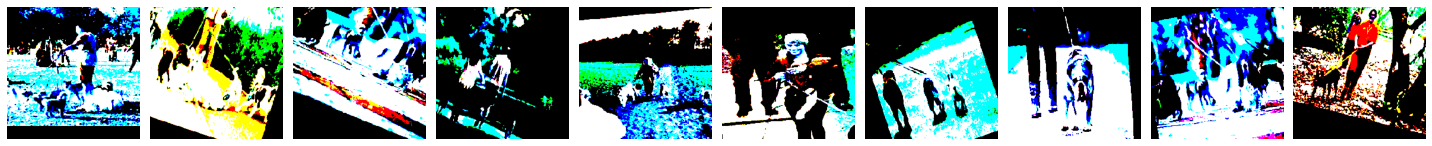

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [42]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [43]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [40]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
test_batches.class_indices

{'looselyChained': 0, 'tightlyChained': 1, 'unchained': 2}

Confusion matrix, without normalization
[[90  8  2]
 [ 4 85 11]
 [ 1  7 92]]


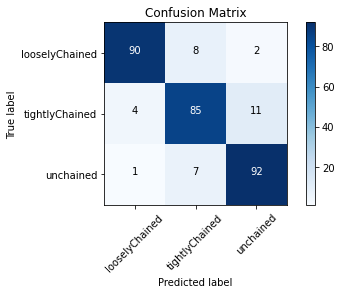

In [51]:
cm_plot_labels = ['looselyChained', 'tightlyChained', 'unchained']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [70]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1), average='micro'))

(0.89, 0.89, 0.89, None)
